In [ ]:
# Examine the relationship between school chornic absenteeism and graduation rates.
# load modules

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
project_id = "xq-data-bigquery"
query = """
with grad_cte as
(select cds_code, perc_graduate
from `dataform_intermediate_xq_school_data.int_ca_doe_graduation_rate`
where year = '2023-24'
  and reporting_category = 'Total'
  and perc_graduate <> 700.0
  and dass like '%No%'),

abs_cte as
(select cds_code, perc_chronic_absenteeism
from `dataform_intermediate_xq_school_data.int_ca_doe_chronic_absenteeism`
where year = '2021-22'
  and reporting_category = 'Total'
  and perc_chronic_absenteeism <> 700.0)

select perc_graduate, perc_chronic_absenteeism
from grad_cte g
  inner join abs_cte a on g.cds_code = a.cds_code
where perc_chronic_absenteeism is not null;
"""
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
print(df.head())

<ipython-input-14-17ee2e5ac898>:24: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query, project_id=project_id, dialect="standard")


  perc_graduate perc_chronic_absenteeism
0  98.300000000             24.400000000
1  96.800000000             19.100000000
2  96.400000000             51.900000000
3  57.600000000             46.600000000
4  95.000000000             30.700000000


In [ ]:
# clean data
df = df.dropna(subset=["perc_graduate", "perc_chronic_absenteeism"])
df["perc_chronic_absenteeism"] = pd.to_numeric(df["perc_chronic_absenteeism"], errors="coerce")
df["perc_graduate"] = pd.to_numeric(df["perc_graduate"], errors="coerce")

                            OLS Regression Results                            
Dep. Variable:          perc_graduate   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.61e-31
Time:                        17:59:55   Log-Likelihood:                -3394.1
No. Observations:                 954   AIC:                             6792.
Df Residuals:                     952   BIC:                             6802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

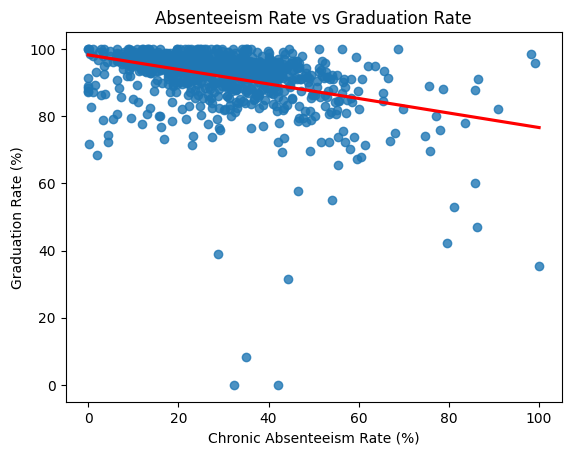

In [ ]:
# Regression Analysis
# Define independent (X) and dependent (Y) variables
X = df["perc_chronic_absenteeism"]
y = df["perc_graduate"]

# Add a constant to the independent variable (for intercept in regression)
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# ---- Visualization ----
# Scatter plot with regression line
sns.regplot(x="perc_chronic_absenteeism", y="perc_graduate", data=df, ci=None, line_kws={"color": "red"})
plt.title("Absenteeism Rate vs Graduation Rate")
plt.xlabel("Chronic Absenteeism Rate (%)")
plt.ylabel("Graduation Rate (%)")
plt.show()


In [ ]:
# Correlation Analysis
# Calculate Pearson correlation
correlation, p_value = pearsonr(df["perc_chronic_absenteeism"], df["perc_graduate"])
print(f"Pearson Correlation Coefficient: {correlation:.2f}, p-value: {p_value:.2e}")

Pearson Correlation Coefficient: -0.36, p-value: 3.61e-31
